In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist, squareform

In [14]:
file_names = [
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHG.Col-0.wt.aerial-part.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHG.Col-0.wt.embryo.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHG.Col-0.wt.endosperm.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHG.Col-0.wt.immature-flower-buds.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHG.Col-0.wt.inflorescence.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHG.Col-0.wt.root.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHG.Col-0.wt.rosette.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHG.Col-0.wt.shoot.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHG.Col-0.wt.sperm-cell.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHG.Col-0.wt.vegetative-nucleus.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHG.Col-0.wt.whole-organism.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHH.Col-0.wt.aerial-part.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHH.Col-0.wt.embryo.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHH.Col-0.wt.endosperm.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHH.Col-0.wt.immature-flower-buds.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHH.Col-0.wt.inflorescence.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHH.Col-0.wt.root.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHH.Col-0.wt.rosette.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHH.Col-0.wt.shoot.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHH.Col-0.wt.sperm-cell.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHH.Col-0.wt.vegetative-nucleus.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CHH.Col-0.wt.whole-organism.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CpG.Col-0.wt.aerial-part.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CpG.Col-0.wt.embryo.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CpG.Col-0.wt.endosperm.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CpG.Col-0.wt.immature-flower-buds.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CpG.Col-0.wt.inflorescence.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CpG.Col-0.wt.root.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CpG.Col-0.wt.rosette.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CpG.Col-0.wt.shoot.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CpG.Col-0.wt.sperm-cell.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CpG.Col-0.wt.vegetative-nucleus.csv",
    "/home/eharpu/shannon/shannonFiles3/output_metadata_CpG.Col-0.wt.whole-organism.csv",
]

new_file_names = [
    "/shares/grossniklaus.botinst.uzh/eharputluoglu/newShannonFilesDir/shannonFiles3/" + path.split('/')[-1]
    for path in file_names
]

file_names = new_file_names

dfs = [pd.read_csv(file_name, sep="\t") for file_name in file_names]

#combined_df = pd.read_csv("combined_df.csv")

In [15]:
interval_measurements = []


for df, context in zip(dfs, file_names):
    #print(context)
    context_name = context.split('.')[-2] + "-" + ((context.split('/')[-1]).split('.')[0]).split('_')[-1]  
    #print(context_name)
    df['interval'] = df['start'].astype(str) + '-' + df['end'].astype(str)  
    context_measurement = df.set_index('interval')['JSD_bit_'].rename(context_name)
    interval_measurements.append(context_measurement)

In [16]:
combined_df = pd.DataFrame()

for series in interval_measurements:
    combined_df = combined_df.join(series, how='outer')


print(combined_df.index.name)  # This should output 'interval'

interval


In [3]:
#combined_df.to_csv("combined_df_chr3.csv")
combined_df = pd.read_csv("combined_df_chr3.csv")

In [4]:
#combined_df.head()
combined_df = combined_df.rename(columns=lambda x: '-'.join(x.split('-')[::-1]).replace('CpG', 'CG'))

print(combined_df.columns)

Index(['interval', 'CHG-part-aerial', 'CHG-embryo', 'CHG-endosperm',
       'CHG-buds-flower-immature', 'CHG-inflorescence', 'CHG-root',
       'CHG-rosette', 'CHG-shoot', 'CHG-cell-sperm', 'CHG-nucleus-vegetative',
       'CHG-organism-whole', 'CHH-part-aerial', 'CHH-embryo', 'CHH-endosperm',
       'CHH-buds-flower-immature', 'CHH-inflorescence', 'CHH-root',
       'CHH-rosette', 'CHH-shoot', 'CHH-cell-sperm', 'CHH-nucleus-vegetative',
       'CHH-organism-whole', 'CG-part-aerial', 'CG-embryo', 'CG-endosperm',
       'CG-buds-flower-immature', 'CG-inflorescence', 'CG-root', 'CG-rosette',
       'CG-shoot', 'CG-cell-sperm', 'CG-nucleus-vegetative',
       'CG-organism-whole'],
      dtype='object')


In [5]:
#df_cleaned = combined_df.dropna(how='all')


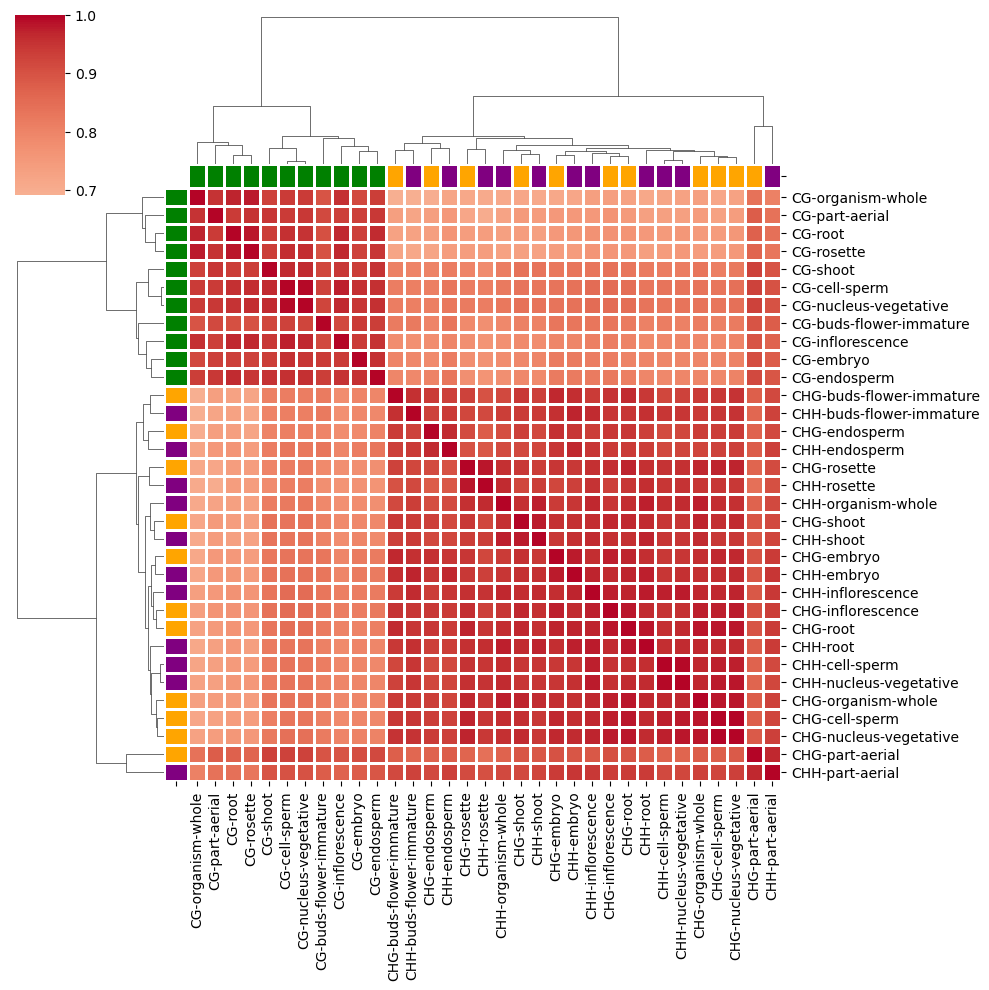

In [6]:
context_colors = {
    'CHG': 'orange',
    'CHH': 'purple',
    'CG': 'green'
}

context_types = combined_df.columns.to_series().apply(lambda x: x.split('-')[0])
col_colors = context_types.map(context_colors)

if 'interval' in combined_df.columns:
    combined_df.set_index('interval', inplace=True)

numeric_index = combined_df.index.str.split('-').str[0].astype(int)
combined_df.index = numeric_index

window_size = 100000

windowed_means = combined_df.groupby(combined_df.index // window_size).mean()
#np.average(dfs[0]['JSD_bit_'], weights=dfs[0]['cov']

windowed_means.reset_index(drop=True, inplace=True)

correlation_matrix = windowed_means.corr(method='spearman', numeric_only=True)

#correlation_matrix = correlation_matrix.abs() 

#correlation_matrix.replace([np.inf, -np.inf], np.nan, inplace=True)

#correlation_matrix = correlation_matrix ** 2

#correlation_matrix[correlation_matrix < 0.5] = 0.50



fig = sns.clustermap(correlation_matrix, 
                           center=0.5, cmap="coolwarm",
                           row_colors=col_colors, col_colors=col_colors,
                           linewidths=0.75, figsize=(10, 10))


plt.show()

In [7]:
fig.savefig("ClusterMap_Chr3.png")